In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Loading in Data

In [2]:
data = pd.read_csv("dataset.csv",  index_col=0)
data.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Preprocessing

Creating two "bins" for classification. If popularity is 1-60 is considered not a hit and anything greater than 60 is consiidered a hit. 

In [3]:
threshold = 60

data['hit'] = (data['popularity'] > threshold).astype(int)
data['explicit'] = data['explicit'].astype(int)
# Verify the data type of the new column
print(data[['hit']].dtypes)
print(data[['explicit']].dtypes)

hit    int64
dtype: object
explicit    int64
dtype: object


In [4]:
data.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,hit
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,1
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,1
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,1


In [5]:
data.shape

(114000, 21)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  int64  
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           114000 

Cleaning the Data: Accounting for missing values

In [7]:
missing_values = data.isnull().sum()
print(missing_values)


track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
hit                 0
dtype: int64


Filling Missing Values

In [8]:
data['artists'].fillna('Unknown', inplace=True)
data['album_name'].fillna('Unknown', inplace=True)
data['track_name'].fillna('Unknown', inplace=True)


/tmp/ipykernel_19632/2866695371.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['artists'].fillna('Unknown', inplace=True)
/tmp/ipykernel_19632/2866695371.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [9]:
data.isnull().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
hit                 0
dtype: int64

In [10]:
data.describe()


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,hit
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.085500,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035,0.119035
std,22.305078,1.072977e+05,0.279626,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621,0.323831
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.000000,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000,0.000000
50%,35.000000,2.129060e+05,0.000000,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000,0.000000
75%,50.000000,2.615060e+05,0.000000,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000,0.000000
max,100.000000,5.237295e+06,1.000000,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000,1.000000


Determining variance in time_signature feature

In [11]:
data['time_signature'].describe()

count    114000.000000
mean          3.904035
std           0.432621
min           0.000000
25%           4.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: time_signature, dtype: float64

Removing irrelevant features

In [12]:
data = data.drop(axis=1, labels='time_signature')
data = data.drop('track_genre', axis = 1)
data = data.drop('album_name', axis = 1)
data.head()

,track_id,artists,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,hit
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,1
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost - Acoustic,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Can't Help Falling In Love,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,1
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,1


Preprocessing

Scaling numerical features

In [13]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select numerical columns to scale
numerical_features = [
    "duration_ms", "danceability", "energy", "key", "loudness", "mode", 
    "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "explicit"
]

# Separate the features and target
data_features = data[numerical_features]
data_target = data["hit"]  # Target variable

# Handle missing values (if any)
data_features = data_features.fillna(data_features.mean())

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
scaled_features = scaler.fit_transform(data_features)

# Convert scaled features back to DataFrame
data_scaled = pd.DataFrame(scaled_features, columns=numerical_features)

# Check the scaled data
print(data_scaled.head())

# If needed, combine scaled features with the target for further processing
data_final = pd.concat([data_scaled, data["hit"]], axis=1)
print(data_final.head())


   duration_ms  danceability    energy       key  loudness      mode  \
0     0.024575      0.629244 -0.717148 -1.210442  0.300828 -1.326281   
1    -0.730859     -0.845908 -1.889980 -1.210442 -1.784744  0.753988   
2    -0.160332     -0.742186 -1.122669 -1.491343 -0.293288  0.753988   
3    -0.243214     -1.733304 -2.312994 -1.491343 -2.039252  0.753988   
4    -0.271919      0.295030 -0.788711 -0.929541 -0.282750  0.753988   

   speechiness  acousticness  instrumentalness  liveness   valence     tempo  \
0     0.551848     -0.850202         -0.504109  0.758743  0.929306 -1.141863   
1    -0.078993      1.831732         -0.504094 -0.591211 -0.798690 -1.489717   
2    -0.273826     -0.315499         -0.504112 -0.507167 -1.365688 -1.528312   
3    -0.457309      1.774593         -0.503883 -0.428376 -1.276974  1.987859   
4    -0.303145      0.463399         -0.504112 -0.686285 -1.184403 -0.073348   

   explicit  
0 -0.305767  
1 -0.305767  
2 -0.305767  
3 -0.305767  
4 -0.305767  
  

Identifying outliers in features

Text(0.5, 1.0, 'Distribution of predictors with outliers')

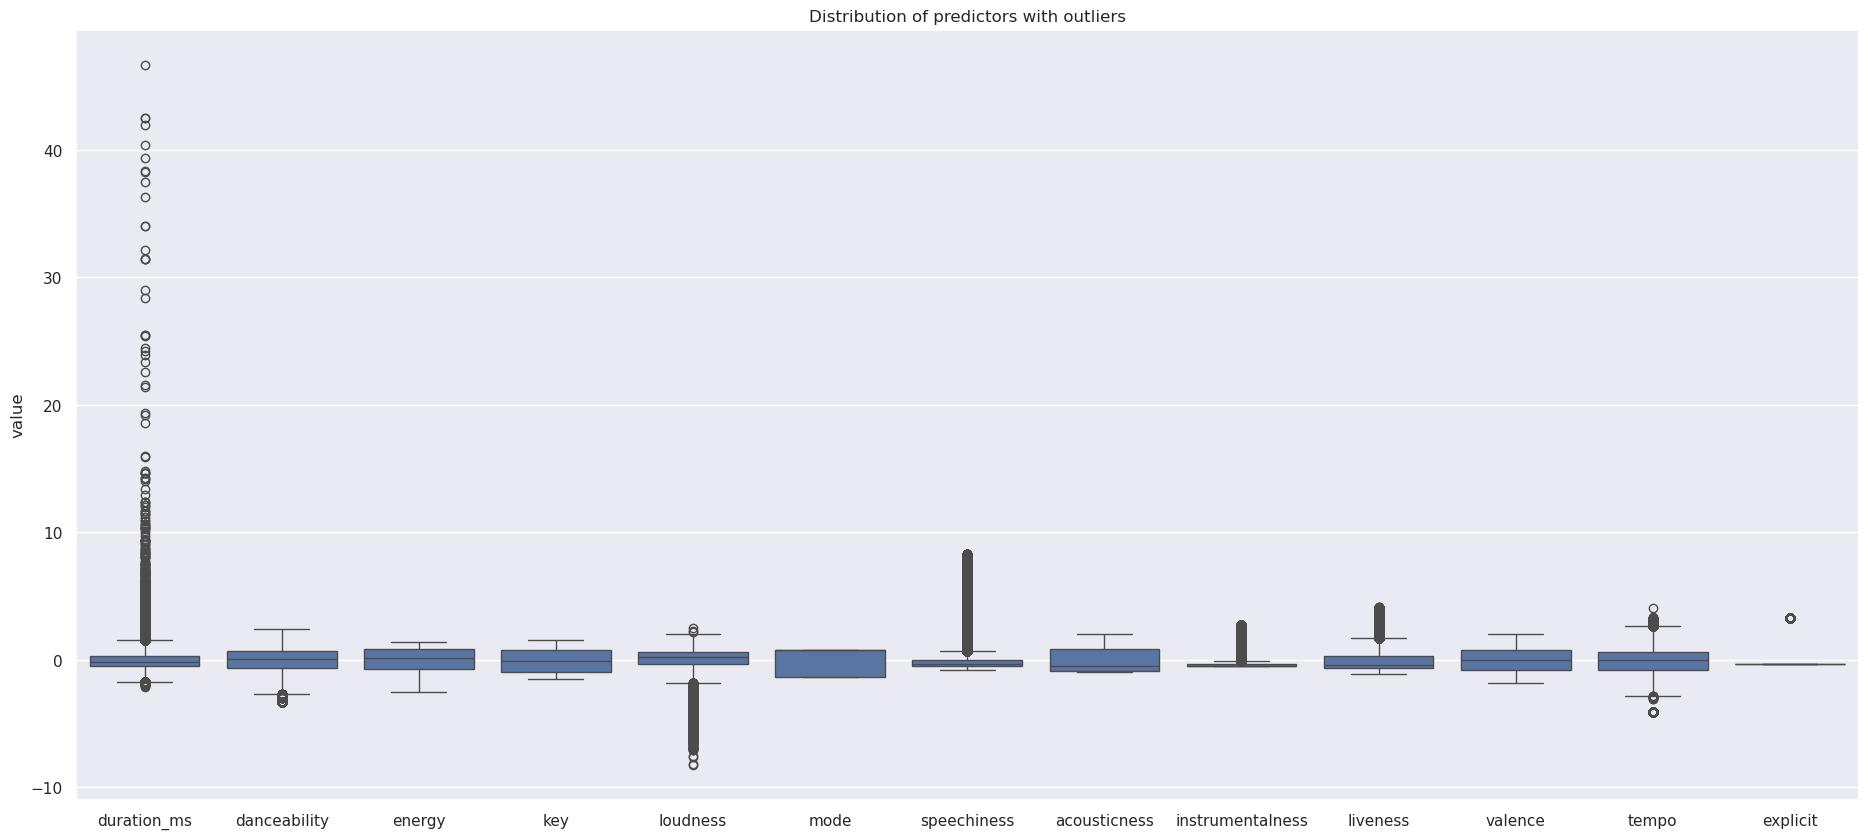

In [14]:
#box plot with outliers
data_melt=pd.melt(data_scaled)
data_melt
sns.set(rc={'figure.figsize':(23,10)})
sns.boxplot(x='variable', y='value', data=data_melt)
plt.xlabel(None)
plt.title('Distribution of predictors with outliers')

Box plot of features without outliers

Text(0.5, 1.0, 'Distribution of predictors without outliers')

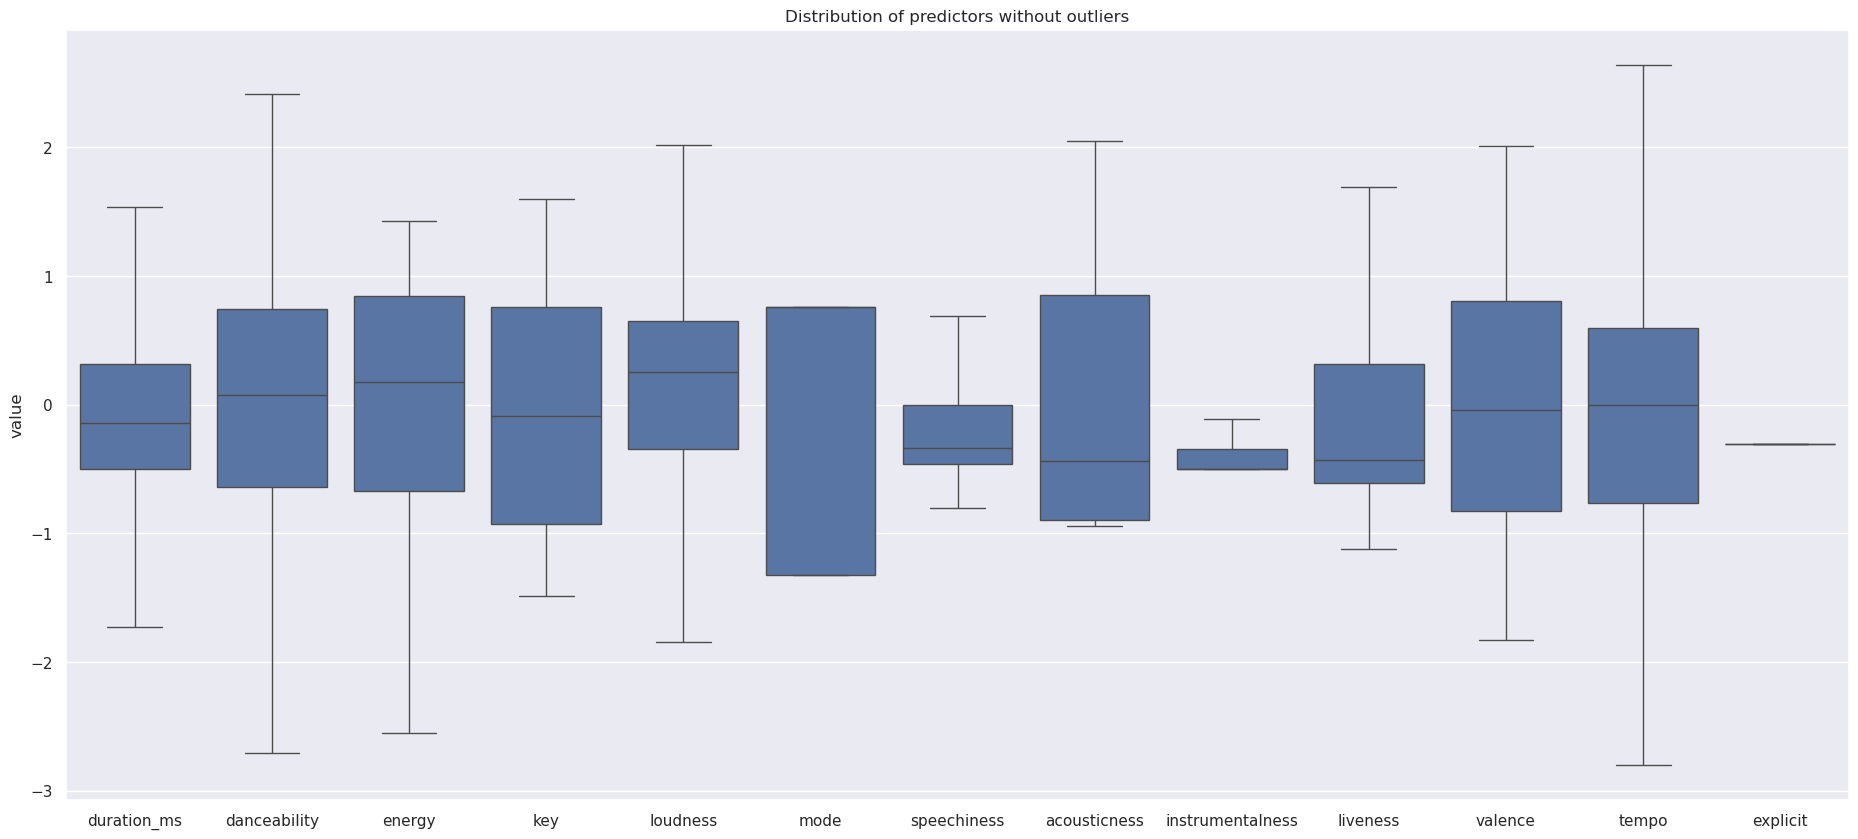

In [15]:
#boxplot without outliers
data_melt=pd.melt(data_scaled)
data_melt
sns.set(rc={'figure.figsize':(23,10)})
sns.boxplot(x='variable', y='value', data=data_melt, showfliers=False)
plt.xlabel(None)
plt.title('Distribution of predictors without outliers')

Interquartile range (IQR) method was used to remove outliers from the scaled dataset

In [16]:

data_clean= data_scaled
for col in data_clean.columns:
  q1=data_clean[col].quantile(0.25)
  q3=data_clean[col].quantile(0.75)
  inq=q3-q1
  filter=(data_clean[col] >= q1-1.5*inq) & (data_clean[col] <= q3+1.5*inq)
  data_clean[col] = data_clean[col].loc[filter]
  

In [17]:

data_remove = data_clean.dropna()
data_remove.shape


(63768, 13)

Box plot after removing the outliers

Text(0.5, 1.0, 'Distribution of predictors without outliers')

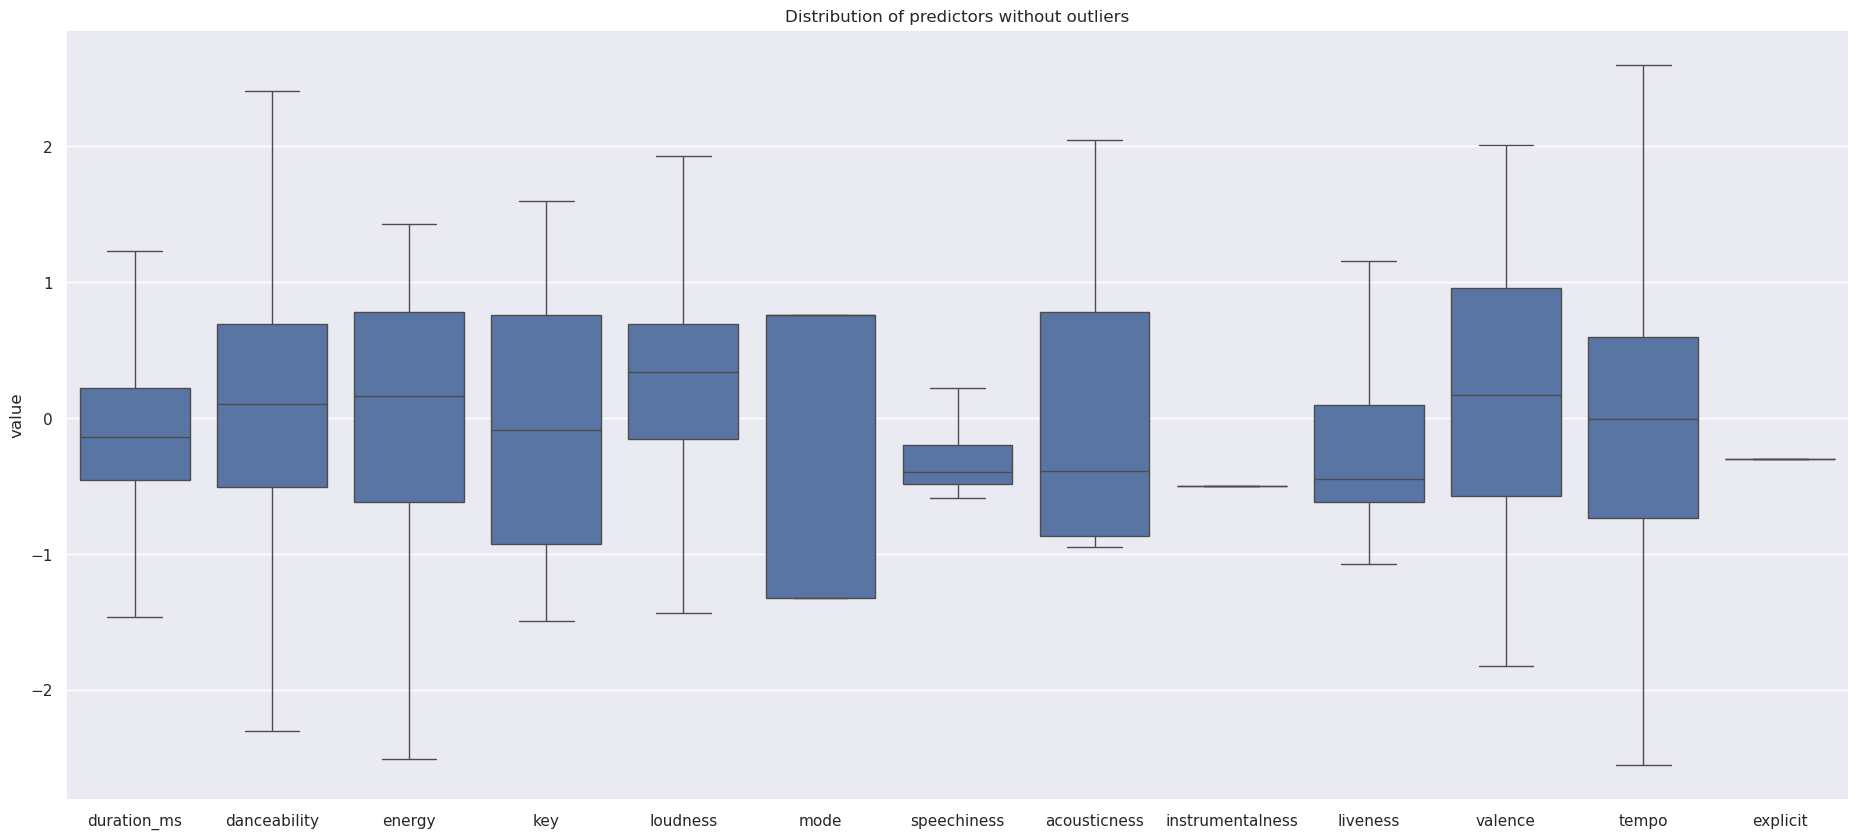

In [18]:
#box plot after removing the outliers
data_melt=pd.melt(data_remove)
data_melt
sns.set(rc={'figure.figsize':(23,10)})
sns.boxplot(x='variable', y='value', data=data_melt, showfliers=False)
plt.xlabel(None)
plt.title('Distribution of predictors without outliers')

Identifying missing values after removing outliers

In [19]:

data_merge = data.iloc[data_remove.index]
data_clean.isna().sum()

duration_ms          5617
danceability          620
energy                  0
key                     0
loudness             6173
mode                    0
speechiness         13211
acousticness            0
instrumentalness    25246
liveness             8642
valence                 0
tempo                 617
explicit             9747
dtype: int64

Filling in missing values using SimpleImputer

In [21]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='mean')
num_cols = ['duration_ms', 'danceability', 'loudness', 'speechiness', 'instrumentalness','liveness', 'tempo', 'explicit']
data_clean[num_cols] = num_imputer.fit_transform(data_clean[num_cols])
print(data_clean.isna().sum())


duration_ms         0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
explicit            0
dtype: int64


In [22]:

data_merge.columns


Index(['track_id', 'artists', 'track_name', 'popularity', 'duration_ms',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'hit'],
      dtype='object')

Checking how many valid (non-missing) entries exist for each feature, split by the 'hit'

In [23]:

data_merge.groupby('hit')[['danceability', 'energy', 'key', 'loudness',
       'mode', 'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms'
       ]].count()


,danceability,energy,key,loudness,mode,acousticness,liveness,valence,tempo,duration_ms
hit,,,,,,,,,,
0,54758,54758,54758,54758,54758,54758,54758,54758,54758,54758
1,9010,9010,9010,9010,9010,9010,9010,9010,9010,9010


Plotting the number of observations

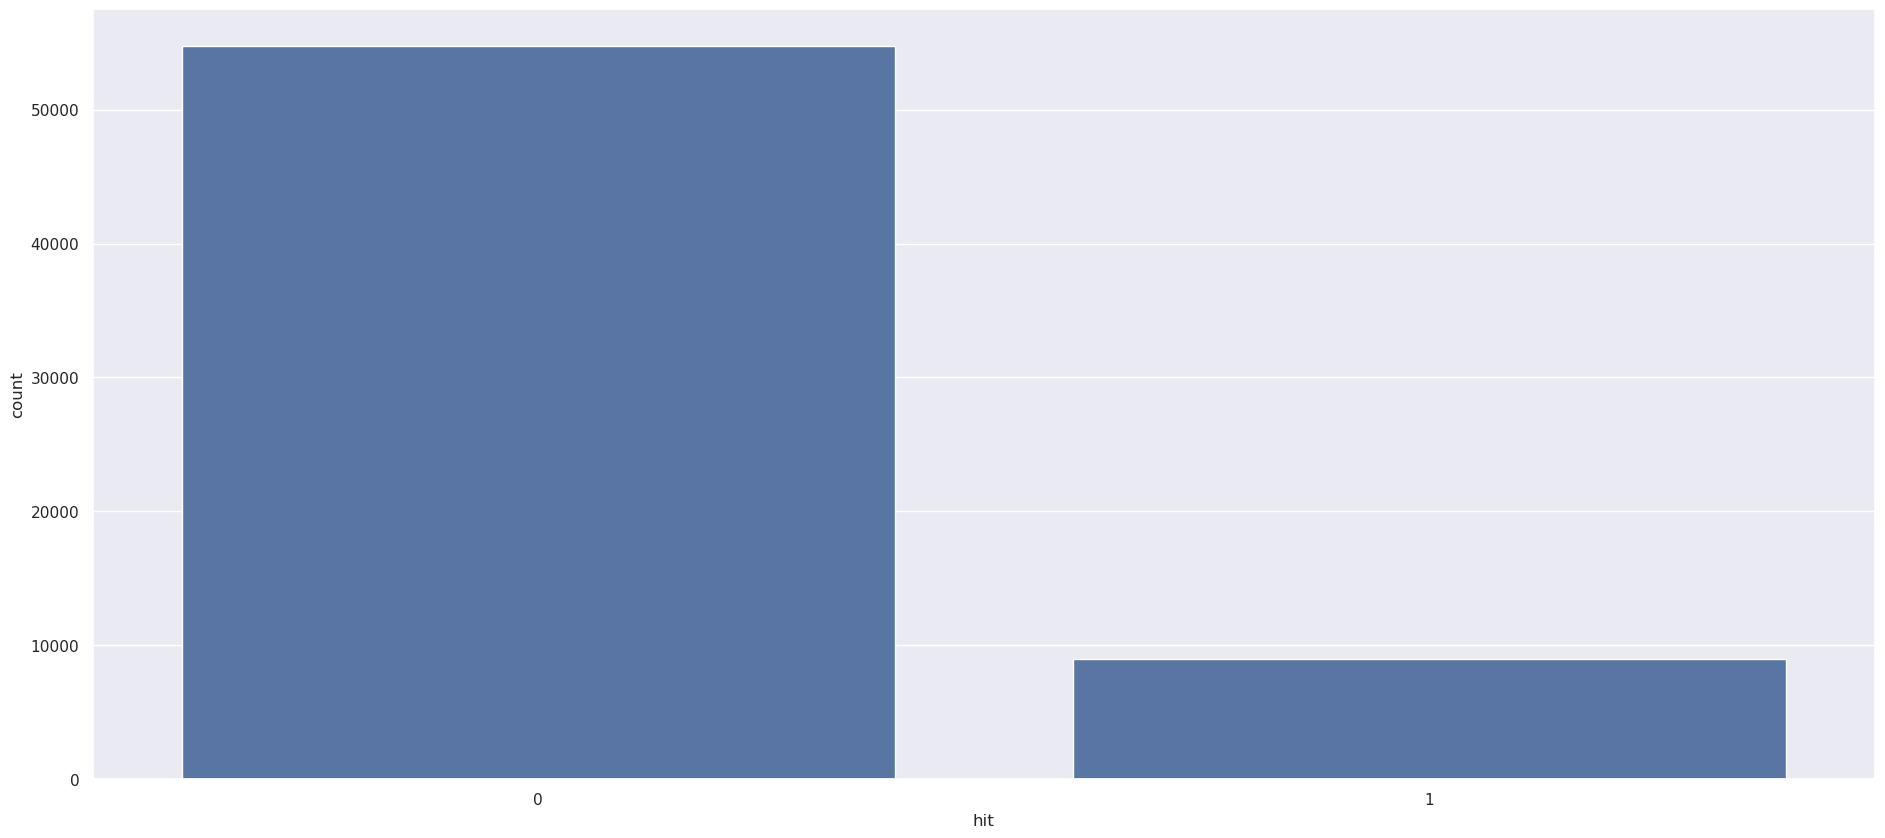

In [25]:
#plotting the number of observations
sns.countplot(x='hit', data=data_merge)
sns.set(rc={'figure.figsize':(12,8)})

Plotting box plots based on target variable for different predictors

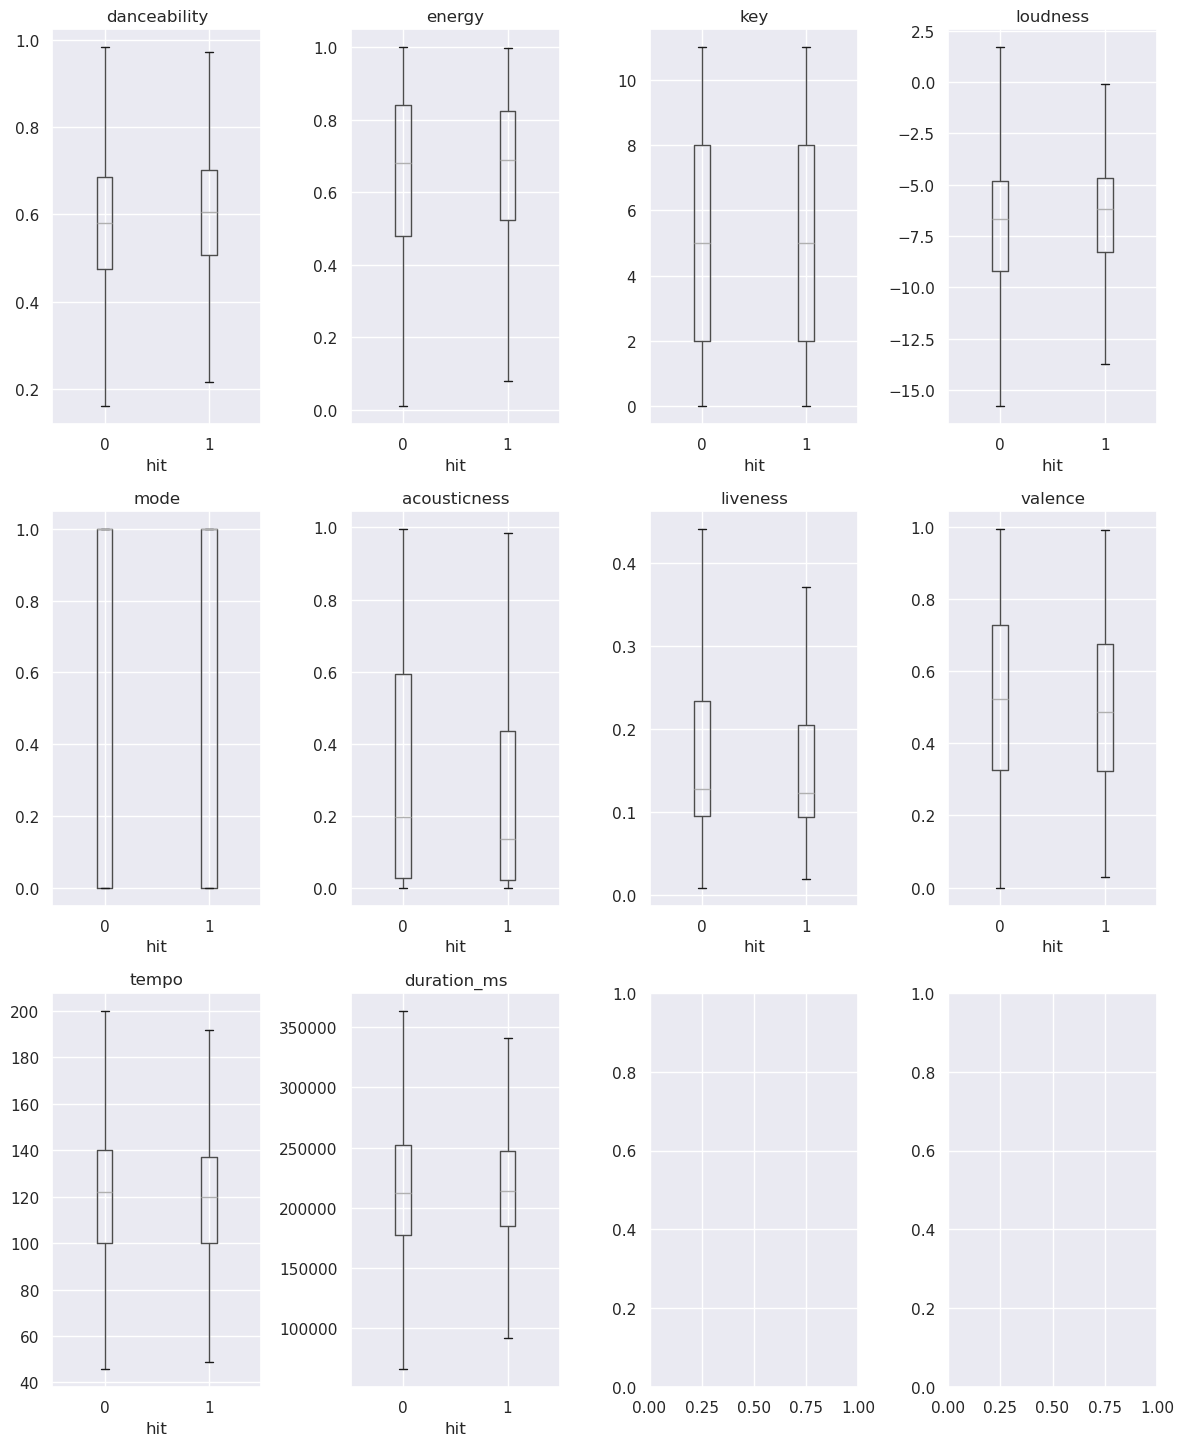

In [26]:
#plotting box plots based on target variable for different predictors
plt.rcParams["figure.figsize"] = [12, 15]
fig, axes = plt.subplots(nrows=3, ncols=4, )
data_merge.boxplot(column= 'danceability', by='hit', ax=axes[0][0], showfliers=False)
data_merge.boxplot(column= 'energy', by='hit', ax=axes[0][1], showfliers=False)
data_merge.boxplot(column='key', by='hit', ax=axes[0][2], showfliers=False)
data_merge.boxplot(column='loudness', by='hit', ax=axes[0][3], showfliers=False)
data_merge.boxplot(column='mode', by='hit', ax=axes[1][0], showfliers=False)
data_merge.boxplot(column='acousticness', by='hit', ax=axes[1][1], showfliers=False)
data_merge.boxplot(column='liveness', by='hit', ax=axes[1][2], showfliers=False)
data_merge.boxplot(column='valence', by='hit', ax=axes[1][3], showfliers=False)
data_merge.boxplot(column='tempo', by='hit', ax=axes[2][0], showfliers=False)
data_merge.boxplot(column='duration_ms', by='hit', ax=axes[2][1], showfliers=False)

plt.tight_layout()
plt.suptitle(None)
plt.show()

Correlation between the predictors

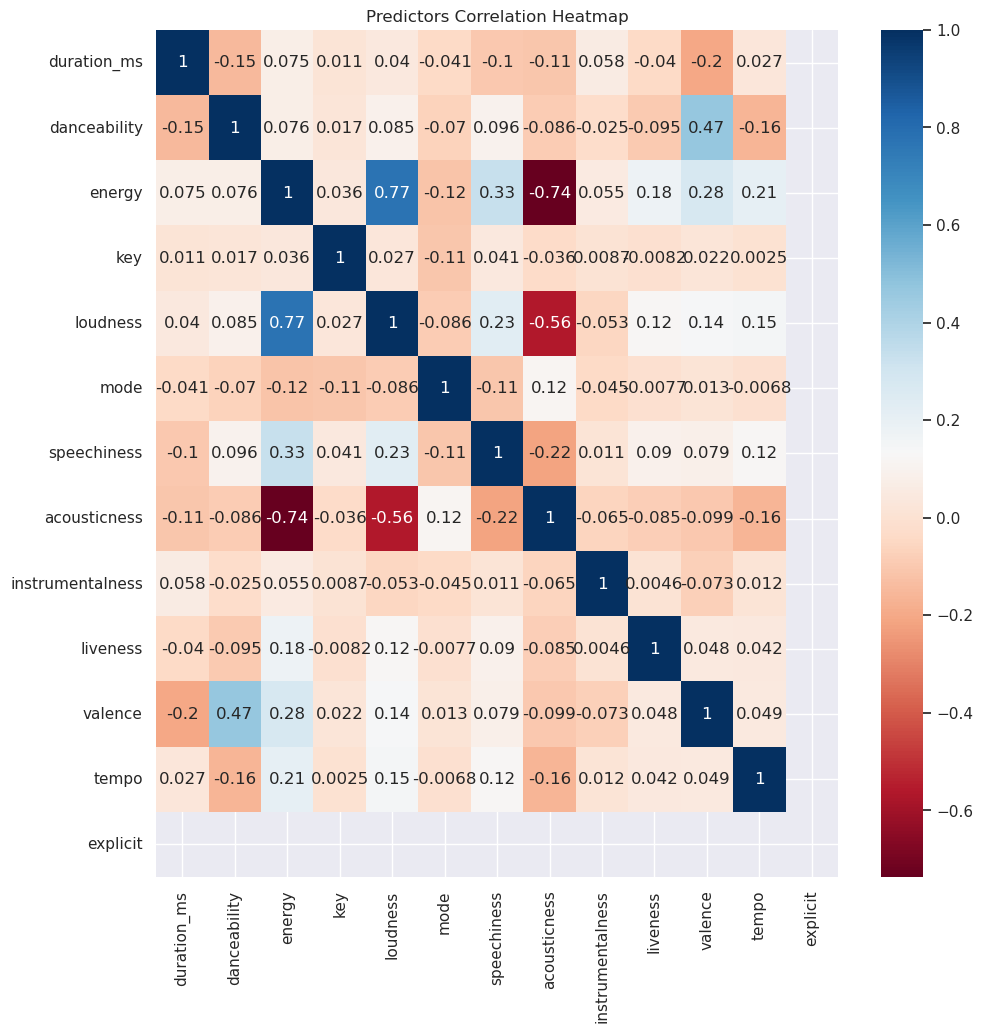

In [28]:
#correlation between the predictors
fig, ax = plt.subplots(figsize=(11,11)) 
ax = sns.heatmap(data_remove.corr(), annot=True, cmap='RdBu').set(title='Predictors Correlation Heatmap')

In [29]:
data_merge.head()


,track_id,artists,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,hit
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,73,230666,0,0.676,0.461,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,1
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost - Acoustic,55,149610,0,0.420,0.166,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,57,210826,0,0.438,0.359,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,0
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,82,198853,0,0.618,0.443,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,1
5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,58,214240,0,0.688,0.481,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.666,98.017,0


In [30]:
data_merge.iloc[:,4:15]

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness
0,230666,0,0.676,0.461,1,-6.746,0,0.1430,0.0322,0.000001,0.3580
1,149610,0,0.420,0.166,1,-17.235,1,0.0763,0.9240,0.000006,0.1010
2,210826,0,0.438,0.359,0,-9.734,1,0.0557,0.2100,0.000000,0.1170
4,198853,0,0.618,0.443,2,-9.681,1,0.0526,0.4690,0.000000,0.0829
5,214240,0,0.688,0.481,6,-8.807,1,0.1050,0.2890,0.000000,0.1890
...,...,...,...,...,...,...,...,...,...,...,...
113993,256026,0,0.505,0.687,10,-4.375,1,0.0287,0.0841,0.000000,0.1880
113994,305454,0,0.331,0.171,1,-15.668,1,0.0350,0.9200,0.022900,0.0679
113997,271466,0,0.629,0.329,0,-10.895,0,0.0420,0.8670,0.000000,0.0839
113998,283893,0,0.587,0.506,7,-10.889,1,0.0297,0.3810,0.000000,0.2700


Creating final scaled data with all the variables

In [31]:

scale = StandardScaler()
scale_X = scale.fit_transform(data_merge.iloc[:,4:15])
data_merge.iloc[:,4:15] = scale_X

/tmp/ipykernel_19632/3954338041.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.23586567 -1.19358461 -0.11401951 ...  0.95538763  1.17454203
  0.43267609]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_merge.iloc[:,4:15] = scale_X
/tmp/ipykernel_19632/3954338041.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.20421362 -1.20421362 -1.48572257 ... -1.48572257  0.48484011
 -1.20421362]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_merge.iloc[:,4:15] = scale_X
/tmp/ipykernel_19632/3954338041.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.42394968  0.70227201  0.70227201 ... -1.42394968  0.70227201
 -1.42394968]' has dtype incompatible with int64, please expl

In [32]:
data_merge

,track_id,artists,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,hit
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,73,0.235866,0,0.651654,-0.839819,-1.204214,0.133757,-1.423950,3.165831,-0.888964,-0.296166,1.757021,0.715,87.917,1
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost - Acoustic,55,-1.193585,0,-1.060792,-2.156928,-1.204214,-3.130917,0.702272,0.811612,1.980917,-0.295891,-0.660842,0.267,77.489,0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,57,-0.114020,0,-0.940385,-1.295226,-1.485723,-0.796251,0.702272,0.084522,-0.316790,-0.296227,-0.510314,0.120,76.332,0
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,82,-0.325167,0,0.263678,-0.920185,-0.922705,-0.779755,0.702272,-0.024894,0.516692,-0.296227,-0.831128,0.167,119.949,1
5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,58,-0.053812,0,0.731925,-0.750524,0.203331,-0.507724,0.702272,1.824597,-0.062562,-0.296227,0.167064,0.666,98.017,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113993,4OkMK49i3NApR1KsAIsTf6,Chris Tomlin,How Can I Keep From Singing,39,0.683098,0,-0.492206,0.169220,1.329367,0.871724,0.702272,-0.868460,-0.721945,-0.296227,0.157656,0.382,104.083,0
113994,4WbOUe6T0sozC7z5ZJgiAA,Lucas Cervetti,"Frecuencia Álmica, Pt. 4",22,1.554778,0,-1.656134,-2.134604,-1.204214,-2.643193,0.702272,-0.646097,1.968045,1.085614,-0.972248,0.327,132.147,0
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Miss Perfumado,22,0.955388,0,0.337259,-1.429170,-1.485723,-1.157609,-1.423950,-0.399028,1.797487,-0.296227,-0.821720,0.743,132.378,0
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Friends,41,1.174542,0,0.056311,-0.638905,0.484840,-1.155741,0.702272,-0.833164,0.233501,-0.296227,0.929114,0.413,135.960,0


Splitting it into training and testing sets, balancing the classes with SMOTE, and scaling the features using StandardScaler

X_train shape: (76660, 11)
X_test shape: (19131, 11)
y_train shape: (76660,)
y_test shape: (19131,)
X shape: (63768, 11)
y shape: (63768,)


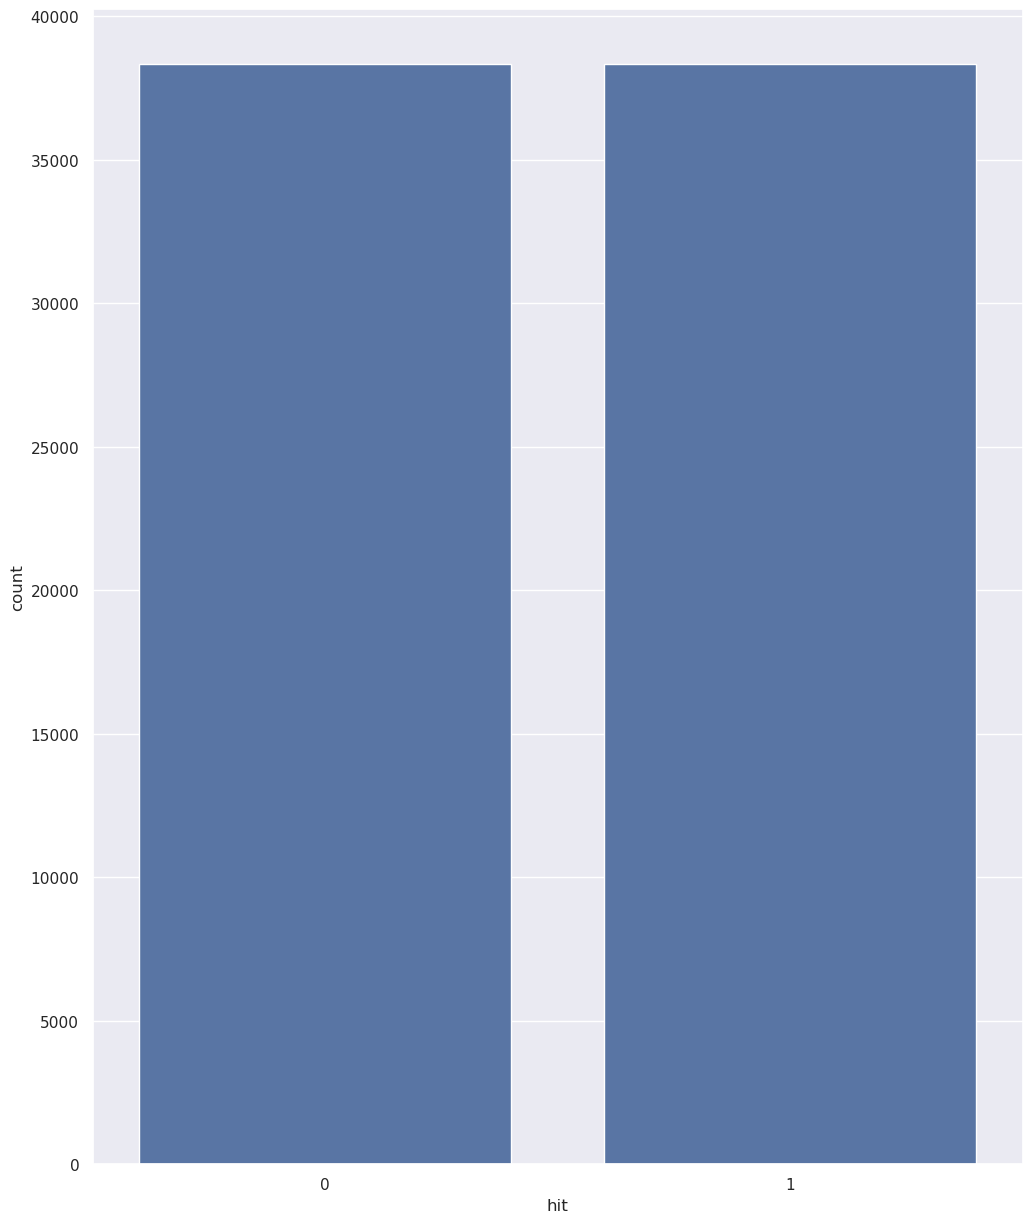

In [35]:
# Define X (features) and y (target)
X = data_merge.iloc[:,4:15]
X.shape
y = data_merge['hit']
y.shape


from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 3: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Check shapes to confirm everything is aligned
print("X_train shape:", X_train_scaled.shape)
print("X_test shape:", X_test_scaled.shape)
print("y_train shape:", y_train_smote.shape)
print("y_test shape:", y_test.shape)


# Confirm shapes
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# Combine X_train_smote and y_train_smote to create a DataFrame for visualization
data_smote = pd.DataFrame(X_train_smote)
data_smote['hit'] = y_train_smote

# Plotting the number of observations
sns.countplot(x='hit', data=data_smote)
sns.set(rc={'figure.figsize': (12, 8)})

Creates interaction terms and polynomial features of degree 2 for the training and testing data, updates the feature names accordingly, and gets them ready for modeling without adding a bias term.

In [45]:
from sklearn.preprocessing import PolynomialFeatures

# Interaction terms and polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_train_scaled)

# Update the feature names for the new features
feature_names = poly.get_feature_names_out(X_train.columns)
X_train_poly = pd.DataFrame(X_poly, columns=feature_names)
X_test_poly = poly.transform(X_test_scaled)

print("Transformed Training Features:")
print(X_train_poly.head())


Transformed Training Features:
   duration_ms  explicit  danceability    energy       key  loudness  \
0    -2.914481       0.0     -0.850521 -1.928423  0.489044 -1.694524   
1     0.078052       0.0     -1.308519  1.445518 -0.360176 -0.579346   
2     0.771273       0.0     -0.711733  0.405929  0.772117  0.830130   
3    -0.452301       0.0      0.127932  1.256502 -1.209396  1.261240   
4    -0.434263       0.0     -0.906036 -0.449370  1.055191 -0.121332   

       mode  speechiness  acousticness  instrumentalness  ...  \
0  0.734464    -0.206560      1.999089         -0.280940  ...   
1  0.734464     2.185725     -0.945241         -0.271961  ...   
2  0.734464    -0.853124      0.114869         -0.244835  ...   
3  0.734464    -0.835164     -0.797079         -0.280940  ...   
4 -1.361877    -0.623235     -0.152852          1.147063  ...   

   mode speechiness  mode acousticness  mode instrumentalness  mode liveness  \
0         -0.151711           1.468260              -0.206341    

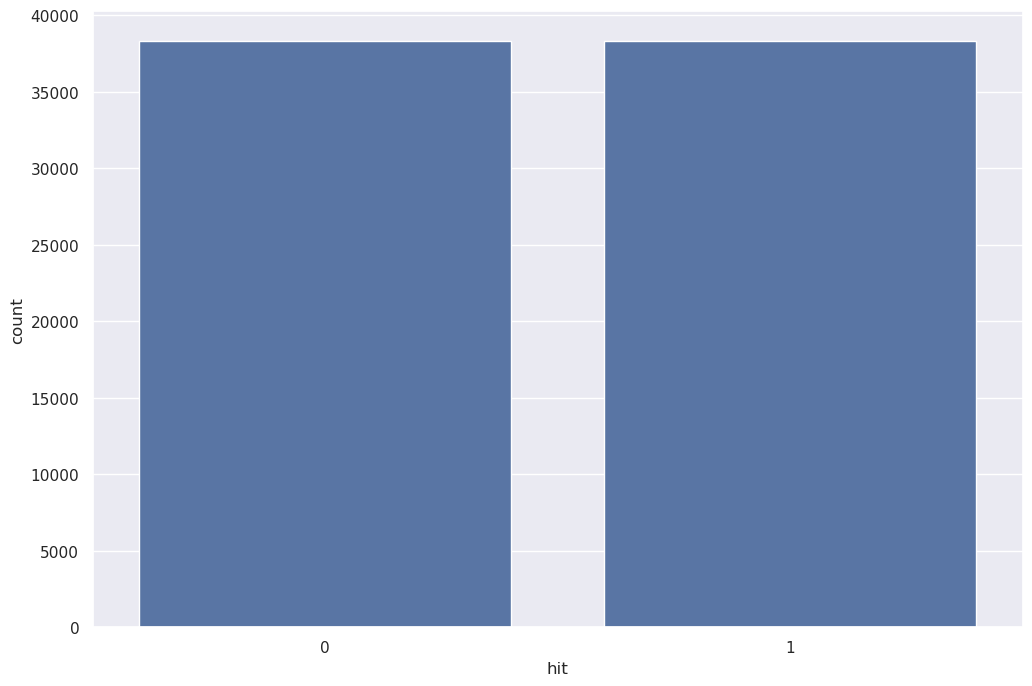

In [46]:
data_poly = pd.DataFrame(X_train_poly)
data_poly['hit'] = y_train_smote

# Plotting the number of observations
sns.countplot(x='hit', data=data_poly)
sns.set(rc={'figure.figsize': (12, 8)})

Implementing XGBoost Classifier and applying GridSearchCV with cv = 3

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from xgboost import XGBClassifier

# Parameter grid
param_grid = {
    'scale_pos_weight': [1.51],
    'max_depth': [6],
    'min_child_weight': [4],
    'subsample': [0.7],
    'learning_rate': [0.1]
}

# Model setup
model = XGBClassifier(n_estimators=100, random_state=42)

# Grid search setup
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit the grid search on training data
grid_search.fit(X_train_scaled, y_train_smote)

# Inspect cross-validation results after fitting
cv_results = grid_search.cv_results_

# Print mean test scores for each parameter combination
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print(f"Mean ROC-AUC: {mean_score:.4f} for Params: {params}")

# Best score (mean cross-validated ROC-AUC) from GridSearchCV
print(f"Best Mean ROC-AUC: {grid_search.best_score_:.4f}")

# Best parameters from grid search
print("Best Parameters:", grid_search.best_params_)

# Use the best model from grid search
best_model = grid_search.best_estimator_

# Make predictions and get probabilities
y_pred = best_model.predict(X_test_scaled)
y_proba = best_model.predict_proba(X_test_scaled)[:, 1]  # Extract positive class probabilities

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba):.4f}")


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Mean ROC-AUC: 0.8863 for Params: {'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 4, 'scale_pos_weight': 1.51, 'subsample': 0.7}
Best Mean ROC-AUC: 0.8863
Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 4, 'scale_pos_weight': 1.51, 'subsample': 0.7}
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.64      0.75     16428
           1       0.21      0.59      0.31      2703

    accuracy                           0.64     19131
   macro avg       0.56      0.62      0.53     19131
weighted avg       0.81      0.64      0.69     19131

ROC-AUC Score: 0.6764


Confusion Matrix for XGBoost results

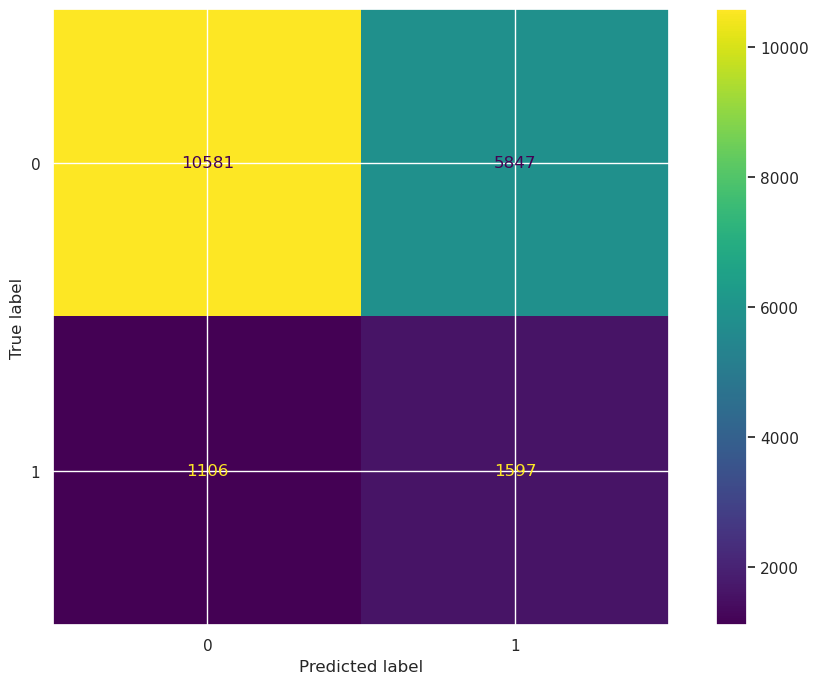

In [49]:
from sklearn.metrics import confusion_matrix #to get access to confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay# to get a display
#Confusion Matrix

conf_mat = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()

    • 10744(Top left): True Negatives (TN) 
    • 5712(Top right): False Positives (FP) 
    • 911 (Bottom left): False Negatives (FN) 
    • 1581 (Bottom right): True Positives (TP) 

Calculate sensitivity and specificity for each class, 

In [50]:

#we need to calculate the true positive rate (TPR) and true negative rate (TNR) for each class.
#The TPR for a class is the proportion of true positives among the actual positives for that class. 
# The TNR for a class is the proportion of true negatives among the actual negatives for that class.
n_classes = conf_mat.shape[0]

for i in range(n_classes):
    tp = conf_mat[i, i]
    fn = sum(conf_mat[i, :]) - tp
    fp = sum(conf_mat[:, i]) - tp
    tn = sum(sum(conf_mat)) - tp - fn - fp
    
    tpr = tp / (tp + fn)
    tnr = tn / (tn + fp)
    
    print(f"Class {i}: TPR = {tpr:.2f}, TNR = {tnr:.2f}")

Class 0: TPR = 0.64, TNR = 0.59
Class 1: TPR = 0.59, TNR = 0.64


ROC_AUC Curve for XGBoost results

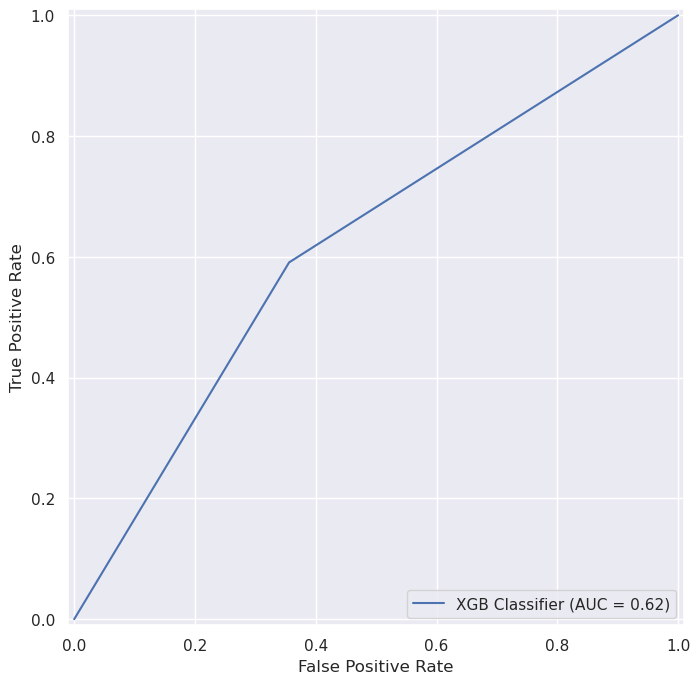

In [51]:
from sklearn import metrics  # Import metrics module for ROC and AUC calculations
from sklearn.metrics import RocCurveDisplay
#ROC

fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr, tpr)
roc_displayNB = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='XGB Classifier')
roc_displayNB.plot()
plt.show()

Precision-Recall Curve for XGBoost

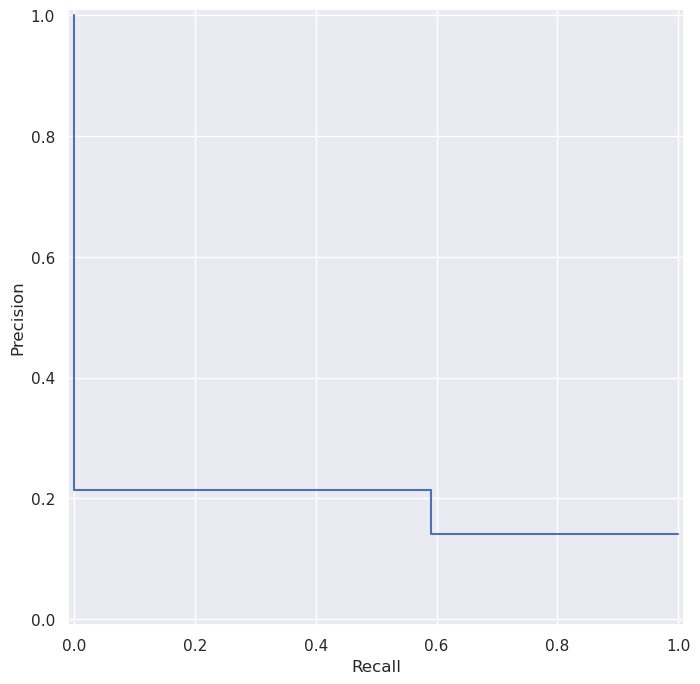

In [52]:

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prec, recall, _ = precision_recall_curve(y_test, y_pred)
pr_displayNB = PrecisionRecallDisplay(precision=prec, recall=recall)
pr_displayNB.plot()
plt.show()

Implementing Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest model with class weights
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train and evaluate the model
rf.fit(X_train_poly, y_train_smote)
y_pred_rf = rf.predict(X_test_poly)

print("Classification Report for Random Forest:")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     16428
           1       0.61      0.56      0.58      2703

    accuracy                           0.89     19131
   macro avg       0.77      0.75      0.76     19131
weighted avg       0.88      0.89      0.88     19131



Confusion Matrix for Random Forest Classifier

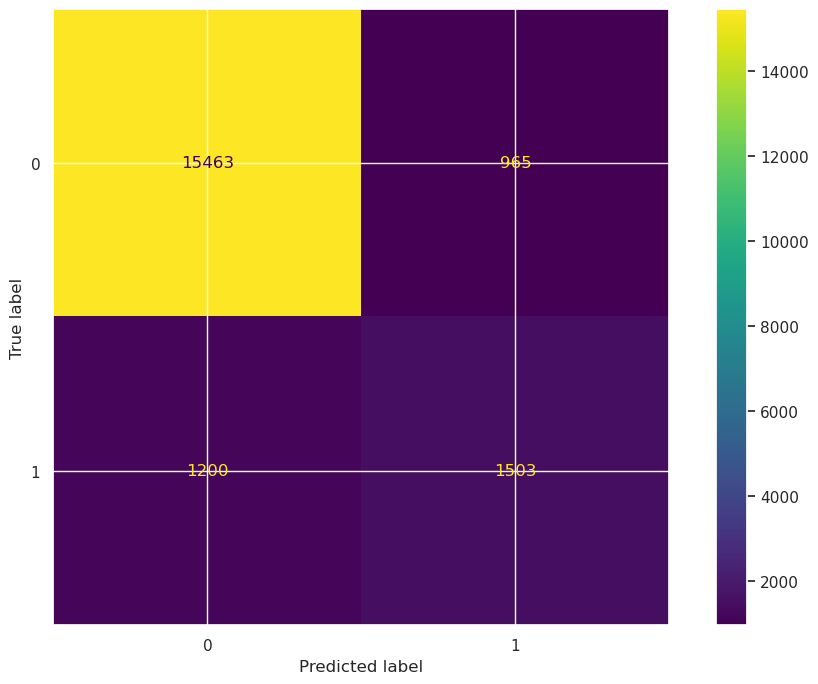

In [54]:
conf_mat = confusion_matrix(y_test, y_pred_rf)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()

Calculate sensitivity and specificity for each class, 

In [55]:
n_classes = conf_mat.shape[0]

for i in range(n_classes):
    tp = conf_mat[i, i]
    fn = sum(conf_mat[i, :]) - tp
    fp = sum(conf_mat[:, i]) - tp
    tn = sum(sum(conf_mat)) - tp - fn - fp
    
    tpr = tp / (tp + fn)
    tnr = tn / (tn + fp)
    
    print(f"Class {i}: TPR = {tpr:.2f}, TNR = {tnr:.2f}")

Class 0: TPR = 0.94, TNR = 0.56
Class 1: TPR = 0.56, TNR = 0.94


ROC-AUC for Random Forest Classifier

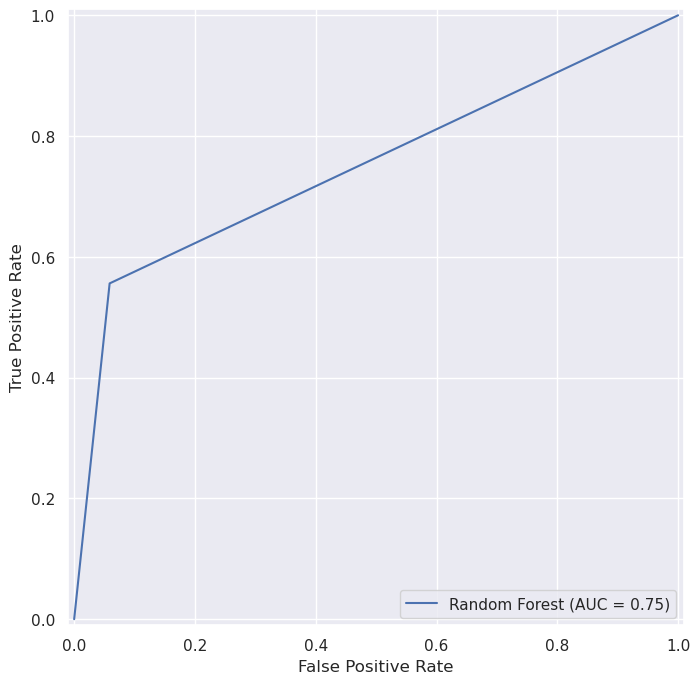

In [56]:
#ROC
from sklearn.metrics import RocCurveDisplay
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)
roc_displayDT = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest')
roc_displayDT.plot()
plt.show()

Precision-Recall Curve for Random Forest

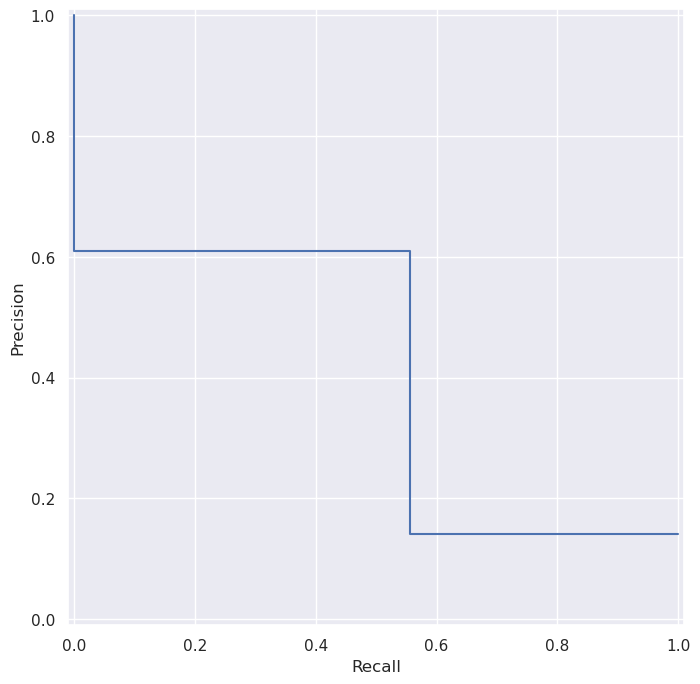

In [57]:

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prec, recall, _ = precision_recall_curve(y_test, y_pred_rf)
pr_displayRF = PrecisionRecallDisplay(precision=prec, recall=recall)
pr_displayRF.plot()
plt.show()

Implementing Logistic Regression Classifier

In [58]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_scaled, y_train_smote)
y_pred_lr = model_lr.predict(X_test_scaled)

print("Classification Report for Logistic Regression:")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr))


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.89      0.55      0.68     16428
           1       0.18      0.59      0.27      2703

    accuracy                           0.56     19131
   macro avg       0.53      0.57      0.48     19131
weighted avg       0.79      0.56      0.62     19131



Confusion Matrix for Logistic Regression

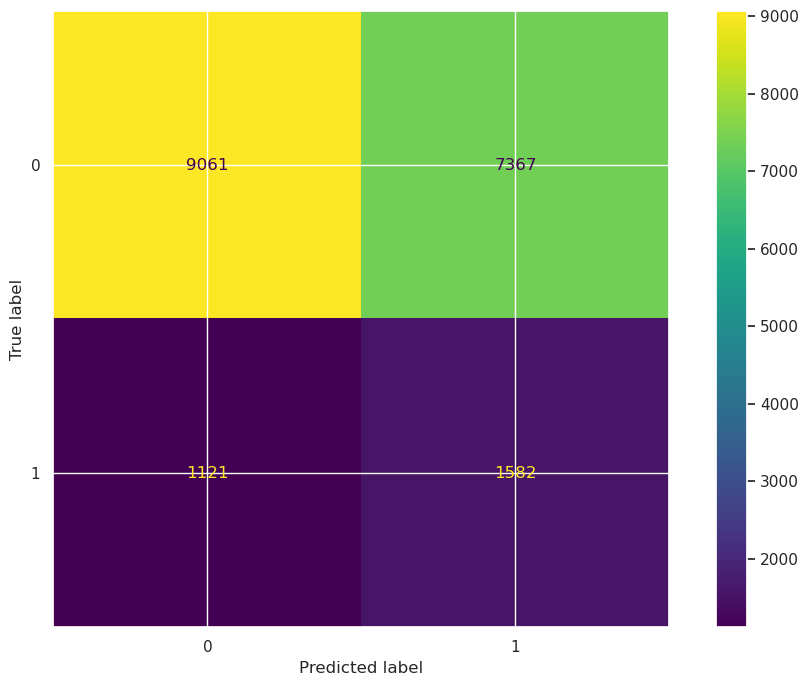

In [59]:
conf_mat = confusion_matrix(y_test, y_pred_lr)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()

Calculate sensitivity and specificity for each class, 

In [60]:
n_classes = conf_mat.shape[0]

for i in range(n_classes):
    tp = conf_mat[i, i]
    fn = sum(conf_mat[i, :]) - tp
    fp = sum(conf_mat[:, i]) - tp
    tn = sum(sum(conf_mat)) - tp - fn - fp
    
    tpr = tp / (tp + fn)
    tnr = tn / (tn + fp)
    
    print(f"Class {i}: TPR = {tpr:.2f}, TNR = {tnr:.2f}")

Class 0: TPR = 0.55, TNR = 0.59
Class 1: TPR = 0.59, TNR = 0.55


ROC-AUC for Logistic Regression

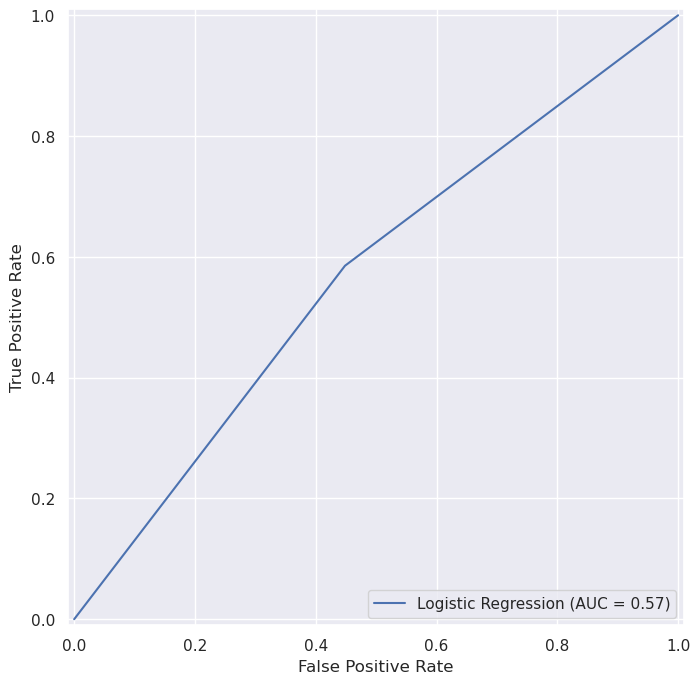

In [61]:
#ROC
from sklearn.metrics import RocCurveDisplay
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_lr)
roc_auc = metrics.auc(fpr, tpr)
roc_displayDT = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
roc_displayDT.plot()
plt.show()

Precision Recall Curve for Logistic Regression

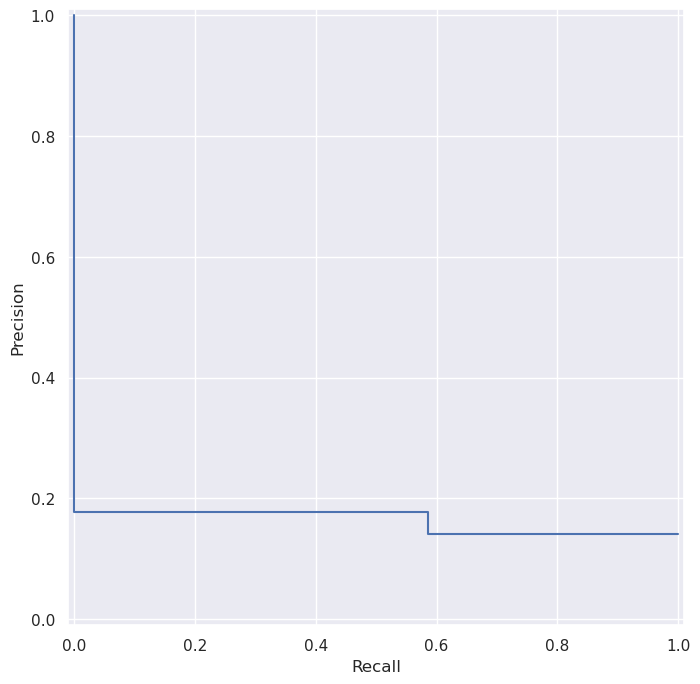

In [62]:
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prec, recall, _ = precision_recall_curve(y_test, y_pred_lr)
pr_displayLR = PrecisionRecallDisplay(precision=prec, recall=recall)
pr_displayLR.plot()
plt.show()

Comparing ROC-AUC for XGBoost, Random Forest, and Logistic Regression

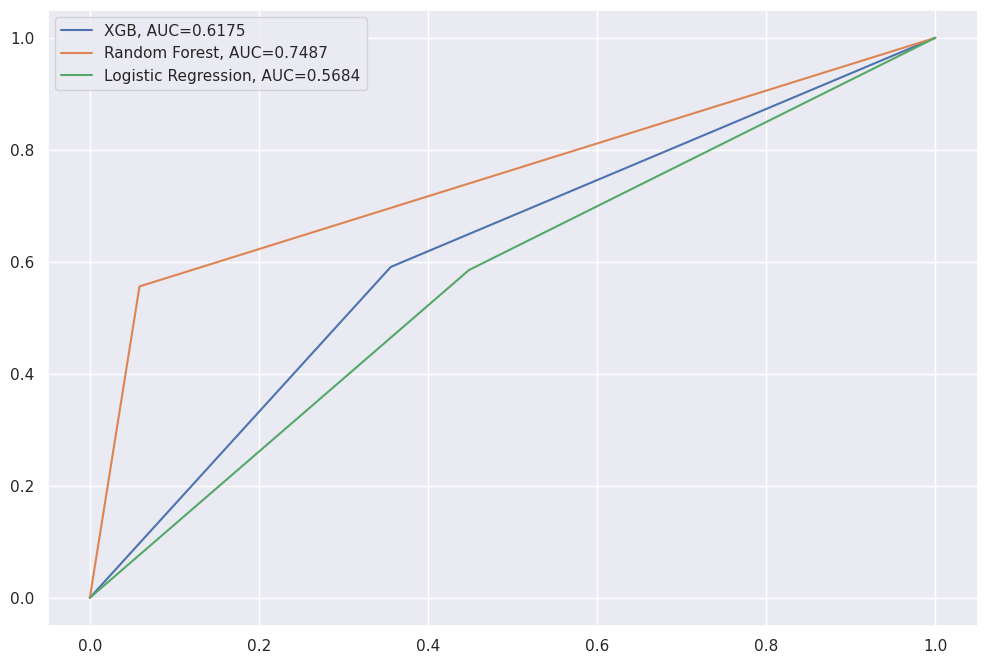

In [63]:
plt.figure()
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="XGB, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_rf)
auc = round(metrics.roc_auc_score(y_test, y_pred_rf), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_lr)
auc = round(metrics.roc_auc_score(y_test, y_pred_lr), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#add legend
plt.legend()
plt.show()

Stratified K-Fold for Random Forest Classifer

In [64]:
from sklearn import model_selection
from sklearn.model_selection import KFold 
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
import numpy as np
# Initialize the StratifiedKFold cross-validator
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)


model_rf =  RandomForestClassifier(class_weight='balanced', random_state=42)

train_f1_scores = []
test_f1_scores = []

# Loop through the folds manually
for train_index, test_index in skf.split(X, y):
    # Use .iloc if X and y are DataFrames/Series, else use standard indexing
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Get predictions for training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate training and testing F1-score (weighted for multi-class)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    train_f1_scores.append(train_f1)
    test_f1_scores.append(test_f1)

# Calculate statistics for training F1-Score
train_f1_mean = np.mean(train_f1_scores)
train_f1_std = np.std(train_f1_scores)
train_f1_cv = (train_f1_std / train_f1_mean) * 100

# Calculate statistics for testing F1-Score
test_f1_mean = np.mean(test_f1_scores)
test_f1_std = np.std(test_f1_scores)
test_f1_cv = (test_f1_std / test_f1_mean) * 100

# Print results for Training and Testing F1-Score in one line
print(f"Training F1-Score (Mean): {train_f1_mean} (Std Dev: {train_f1_std}) CV: {train_f1_cv}%")
print(f"Testing F1-Score (Mean): {test_f1_mean} (Std Dev: {test_f1_std}) CV: {test_f1_cv}%")

Training F1-Score (Mean): 0.8561996974776326 (Std Dev: 0.002208793749803457) CV: 0.25797646931090623%
Testing F1-Score (Mean): 0.8241256197139701 (Std Dev: 0.0034276450695046737) CV: 0.415912936997919%


5-fold cross-validation with their best hyperparameters. To check if the performance difference between the models was meaningful, a paired t-test and a Wilcoxon signed-rank test were performed.

In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
from scipy.stats import ttest_rel, wilcoxon
import numpy as np
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Best hyperparameters from Grid Search
best_XGB_params = {
    'scale_pos_weight': 1.51,
    'max_depth': 6,
    'min_child_weight': 4,
    'subsample': 0.7,
    'learning_rate': 0.1
}
best_RF_params = {
    'n_estimators': 200,
    'max_depth': 20,
    'min_samples_split': 5,
    'class_weight': 'balanced',
    'random_state': 42
}

# Initialize the models with the best hyperparameters
best_XGB = XGBClassifier(**best_XGB_params, random_state=1)
best_RF = RandomForestClassifier(**best_RF_params)

# Use weighted F1-score as the evaluation metric
f1_scorer = make_scorer(f1_score, average='weighted')

# Perform cross-validation (5-fold CV here) and collect F1-scores for both models
# Using X_train_poly and y_train_smote from your data pipeline
f1_scores_XGB = cross_val_score(best_XGB, X_train_poly, y_train_smote, cv=5, scoring=f1_scorer, n_jobs=-1)
f1_scores_RF = cross_val_score(best_RF, X_train_poly, y_train_smote, cv=5, scoring=f1_scorer, n_jobs=-1)

# Print the cross-validated F1-scores
print(f"XGB F1-scores: {f1_scores_XGB}")
print(f"Random Forest F1-scores: {f1_scores_RF}")

# Compute the mean and standard deviation of the F1-scores
print(f"XGB F1-Score Mean: {np.mean(f1_scores_XGB):.4f}, Std Dev: {np.std(f1_scores_XGB):.4f} CV: {np.std(f1_scores_XGB)/np.mean(f1_scores_XGB)*100:.4f}%")
print(f"Random Forest F1-Score Mean: {np.mean(f1_scores_RF):.4f}, Std Dev: {np.std(f1_scores_RF):.4f} CV: {np.std(f1_scores_RF)/np.mean(f1_scores_RF)*100:.4f}%")

# Perform a paired t-test (parametric test) to see if there's a significant difference
t_stat, p_value_t = ttest_rel(f1_scores_XGB, f1_scores_RF)
print(f"Paired t-test: t-statistic = {t_stat:.4f}, p-value = {p_value_t:.4f}")

# Perform the Wilcoxon signed-rank test (non-parametric test)
w_stat, p_value_w = wilcoxon(f1_scores_XGB, f1_scores_RF)
print(f"Wilcoxon signed-rank test: W-statistic = {w_stat:.4f}, p-value = {p_value_w:.4f}")


XGB F1-scores: [0.72074876 0.79400798 0.80878404 0.80038888 0.80488155]
Random Forest F1-scores: [0.84437088 0.89225634 0.89958158 0.89691602 0.90120147]
XGB F1-Score Mean: 0.7858, Std Dev: 0.0329 CV: 4.1840%
Random Forest F1-Score Mean: 0.8869, Std Dev: 0.0215 CV: 2.4200%
Paired t-test: t-statistic = -17.5298, p-value = 0.0001
Wilcoxon signed-rank test: W-statistic = 0.0000, p-value = 0.0625
